# Pandas data frames and visualisation

**Author**: Andrea Ballatore (Birkbeck, University of London)

**Abstract**: Learn how to use data frames with the **pandas** package (https://pandas.pydata.org) and how to do basic data visualisations with **matplotlib**.

## Setup
This is to check that your environment is set up correctly (it should print 'env ok').

In [1]:
# Test geospatial libraries
# check environment
import os
print("Conda env:", os.environ['CONDA_DEFAULT_ENV'])
if os.environ['CONDA_DEFAULT_ENV'] != 'geoprogv1':
    raise Exception("Set the environment 'geoprogv1' on Anaconda. Current environment: " + os.environ['CONDA_DEFAULT_ENV'])

# spatial libraries 
import fiona as fi
import pandas as pd
import pysal as sal
import matplotlib.pyplot as plt
import numpy as np

print('env ok')

Conda env: geoprogv1
env ok


----
## Tables

- Python supports many data structures, such as lists and dictionaries. 
- These data structures are very useful but, in data science, we tend to work with tabular data.
- A **table** is a concept coming from the world of relational databases. 
- A table has **columns** representing attributes and **rows** representing cases/individuals. 
- For example, this is a table with 3 colums and 4 rows representing some urban data:

| city_id | city_name | population_2020 | area_km2 |
| -: | :--- | -----------: | ---: |
| 1 | London | 8982000 | 1572 | 
| 2 | Lagos | 14368000 | 1171 |
| 3 | Hong Kong | 7451000 | 1106 |
| 4 | Lima | 10719000 | 2672 |

- To import pandas in your notebook, note the `import pandas as pd` at the beginning of the notebook. The `as pd` allows to refer to pandas functionality with an abbreviation, as shown below.
- This cheat sheet summarises the main concepts and functionality of `pandas`: (https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

## Pandas data frames

- To work with tabular data in Python, the package `pandas` is the best option.
- `pandas` provides support for tables with a data structures called **data frame**.
- A data frame has an **index** containing the row names and **columns**.
- Row names must be unique (for example, you cannot have `1` `1` `2` as row names).
- You can create a data frame this way, with `a` `b` `c` being the columns and `1` `2` `3` being the row names (the index):

In [2]:
# pd.DataFrame is an abbreviation for pandas.DataFrame
test_df = pd.DataFrame({"a" : [4 ,5, 6],
    "b" : [7, 8, 9],
    "c" : [10, 11, 12]},
    index = [1, 2, 3])
# show the data frame
test_df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


## Dictionaries

- To understand this syntax, it is useful to look at the **dictionary**, one of the basic Python data structures.
- A dictionary is a set of **key/value pairs**. Keys must be unique. 
- Values can be non-unique. Values can be lists or other complex objects.
- Note that dictionaries are *sets* and not sequences. The order of the pairs is not defined and might vary.
- For example, dictionaries can be used to represent associations between codes and descriptions:

In [3]:
# syntax: { <key1>: <value1>, <key2>: <value2>, ... }
country_codes = {
    'GB':"United Kingdom",
    'AR':'Argentina', 
    'ER':'Eritrea',
    'JP':'Japan'
}

In [4]:
# print dictionary size
print(len(country_codes))

4


In [5]:
# print keys
print(country_codes.keys())

# print values
print(country_codes.values())

dict_keys(['GB', 'AR', 'ER', 'JP'])
dict_values(['United Kingdom', 'Argentina', 'Eritrea', 'Japan'])


In [6]:
# select a value by key:
print(country_codes['AR'])

# add a new key/value pair
country_codes['LI'] = 'Liechtenstein'

Argentina


In [7]:
# print new dictionary size
print(len(country_codes))

5


## Exploring data frames

- Pandas allows you to explore a data frame in many ways:

In [8]:
# get general information about the data frame
print("number of rows:", len(test_df))
print("number of columns:", len(test_df.columns))

number of rows: 3
number of columns: 3


In [9]:
# list the index (integers in this case)
print("index:", test_df.index) 

# list the columns (strings)
print("columns:", test_df.columns) 

index: Int64Index([1, 2, 3], dtype='int64')
columns: Index(['a', 'b', 'c'], dtype='object')


- Let us create a more interesting data frame with city data.
- Note that, as in databases, it is recommended to use consistent attribute names without spaces:

In [10]:
cities_df = pd.DataFrame({"city_id" : [1,2,3,4],
    "city_name" : ["London", "Lagos", "Hong Kong", "Lima"],
    "population_2020" : [8982000, 14368000, 7451000, 10719000],
    "area_km2" : [1572, 1171, 1106, 2672]},
    index = [1, 2, 3, 4])

In [11]:
print("number of cities:",len(cities_df))
print("number of attributes:",len(cities_df.columns))

# note that the index (shown on the left) is NOT an attribute:
cities_df

number of cities: 4
number of attributes: 4


,city_id,city_name,population_2020,area_km2
1,1,London,8982000,1572
2,2,Lagos,14368000,1171
3,3,Hong Kong,7451000,1106
4,4,Lima,10719000,2672


- With `pandas`, you can extract data from a data frame by selecting rows and columns.
- These operations are very similar to those supported by SQL in relational databases:

In [12]:
# get the name column
print(cities_df['city_name'])
# get the population column
print(cities_df['population_2020'])

1       London
2        Lagos
3    Hong Kong
4         Lima
Name: city_name, dtype: object
1     8982000
2    14368000
3     7451000
4    10719000
Name: population_2020, dtype: int64


In [13]:
# get a row by index
print(cities_df.loc[1])

# copy the data into a new data frame containing only 2 columns:
sel_df = cities_df[['city_name','area_km2']]
print('N columns in sel_df', len(sel_df.columns))

city_id                  1
city_name           London
population_2020    8982000
area_km2              1572
Name: 1, dtype: object
N columns in sel_df 2


- You can **derive new attributes** from the existing ones.
- To do this, you do not need to use a `for` loop. `pandas` can apply an operation on whole columns, value by value. This concept is called **vectorisation** and makes your life at a lot easier.
- For example, you can calculate the population density in a single, intuitive instruction:


In [14]:
cities_df['pop_km2'] = cities_df['population_2020']/cities_df['area_km2']
# route the value to the first digit
cities_df['pop_km2'] = round(cities_df['pop_km2'],1)
cities_df

,city_id,city_name,population_2020,area_km2,pop_km2
1,1,London,8982000,1572,5713.7
2,2,Lagos,14368000,1171,12269.9
3,3,Hong Kong,7451000,1106,6736.9
4,4,Lima,10719000,2672,4011.6


## Read and write dataframes

- `pandas` provides functionality to import and export data frames in a variety of formats.


In [27]:
# create output folder 'out' (if does not already exist)
if not os.path.exists('out'):
    os.makedirs('out')
    
cities_df

,city_id,city_name,population_2020,area_km2,pop_km2
1,1,London,8982000,1572,5713.7
2,2,Lagos,14368000,1171,12269.9
3,3,Hong Kong,7451000,1106,6736.9
4,4,Lima,10719000,2672,4011.6


In [15]:
# write cities data frame to a CSV file:
cities_df.to_csv('out/cities_df.csv')

- The resulting CSV file has this content:
```
,city_id,city_name,population_2020,area_km2,pop_km2
1,1,London,8982000,1572,5713.7
2,2,Lagos,14368000,1171,12269.9
3,3,Hong Kong,7451000,1106,6736.9
4,4,Lima,10719000,2672,4011.6
```
- Note that the index is included. Often we want to exclude the index from the CSV output.
- Check the new files in the `out` folder:

In [28]:
# write CSV file without index
cities_df.to_csv('out/cities_noindex_df.csv', index=False)

- Explore the results with Excel in the folder `out`.
- When doing data science in Python, the best way to store a data frame (or any data) in a file is **pickle**. 
- Every format conversion (for example to and from CSV or TSV) risks generating some data loss or errors, while pickle is faster and more reliable.
- `pandas` allows you to store directly a data frame in a pickle file:

In [17]:
cities_df.to_pickle('out/cities_df.pik')

## World Bank data

- The local folder `data` includes external datasets that you can read.
- Let us read a real dataset into our notebook.
- This dataset with country-level indicators was collected from the World Bank in December 2020 (https://data.worldbank.org).
- To keep the example to a manageable size, the dataset includes EU countries and the UK.
- First, let us take a look at the **data dictionary** that describes the World Bank indicators in this dataset, loading it from a file:

In [2]:
# this file is saved as tab-separate values (TSV) 
# which is a bit safer than CSV to exchange data:
wb_var_df = pd.read_csv('data/world_bank_indicators_eu_dict.tsv', sep='\t')

# check the column names
print(wb_var_df.columns)

# list all variables
wb_var_df[['indicator_id','indicator']]

Index(['indicator_id', 'indicator', 'unit', 'indicator_desc', 'source_org',
       'source_id', 'source'],
      dtype='object')


,indicator_id,indicator
0,GB.XPD.RSDV.GD.ZS,Research and development expenditure (% of GDP)
1,IT.NET.USER.ZS,Individuals using the Internet (% of population)
2,NY.GDP.MKTP.PP.CD,"GDP, PPP (current international $)"
3,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)"
4,SP.POP.TOTL,"Population, total"
5,ST.INT.ARVL,"International tourism, number of arrivals"


- Now let us load the data frame with the indicators.
- A row contains an indicator about a `country` for a given year (`date`).
- The column names are the code specified above.
- `iso3c` and `iso2c` are ISO standard country names:

In [3]:
wb_ind_df = pd.read_csv('data/world_bank_indicators_eu_df.tsv', sep='\t')
print('rows:',len(wb_ind_df))
print('columns:',wb_ind_df.columns)

rows: 560
columns: Index(['iso2c', 'iso3c', 'country', 'date', 'SP.POP.TOTL', 'IT.NET.USER.ZS',
       'SP.DYN.LE00.IN', 'ST.INT.ARVL', 'GB.XPD.RSDV.GD.ZS',
       'NY.GDP.MKTP.PP.CD'],
      dtype='object')


- Let us select a subset of rows from this data frame using a condition.
- The most complete data is from 2014. Select all rows with where `date==2014`:

In [4]:
wb2014_df = wb_ind_df.loc[wb_ind_df['date'] == 2014, ]
print('rows:', len(wb2014_df))

# alternatively, you can obtain the same result 
# with this SQL-like syntax:
wb2014_df = wb_ind_df.query("date == 2014")
print('rows:', len(wb2014_df))

rows: 28
rows: 28


In [5]:
# for readability, rename columns with simpler names with 'rename'
wb2014_df = wb2014_df.rename(columns={"SP.POP.TOTL": "pop", 
    "ST.INT.ARVL": "in_tourists",              
    'SP.DYN.LE00.IN':'life_exp',
    "IT.NET.USER.ZS":'internet_users',
    "GB.XPD.RSDV.GD.ZS":'research_gdp',
    'NY.GDP.MKTP.PP.CD': 'gdp'})

wb2014_df

,iso2c,iso3c,country,date,pop,internet_users,life_exp,in_tourists,research_gdp,gdp
4,AT,AUT,Austria,2014,8546356,80.995825,81.490244,25291000.0,3.08429,4.170597e+11
23,BE,BEL,Belgium,2014,11209057,85.000000,81.287805,7887000.0,2.38729,5.036194e+11
47,BG,BGR,Bulgaria,2014,7223938,55.490000,74.465854,7311000.0,0.79377,1.268198e+11
78,CY,CYP,Cyprus,2014,1152285,69.330000,80.178000,2441000.0,0.50835,2.561163e+10
95,CZ,CZE,Czech Republic,2014,10525347,74.231712,78.824390,8096000.0,1.97285,3.395826e+11
119,DE,DEU,Germany,2014,80982500,86.190000,81.090244,32999000.0,2.86691,3.807113e+12
127,DK,DNK,Denmark,2014,5643475,95.990000,80.700000,10267000.0,2.91409,2.703306e+11
144,ES,ESP,Spain,2014,46480882,76.190000,83.229268,64939000.0,1.23535,1.558306e+12
171,EE,EST,Estonia,2014,1314545,84.241528,77.034146,3160000.0,1.42931,3.830019e+10
192,FI,FIN,Finland,2014,5461512,86.530393,81.180488,2731000.0,3.16931,2.280586e+11


- Save data into a CSV file:

In [6]:
wb2014_df.to_csv('out/world_bank_eu_2014.csv', index=False)

## Descriptive statistics

- `pandas` provides basic functions to calculate descriptive statistics from a data frame.
- This is similar to what you can do in Microsoft Excel (but better, of course).

In [22]:
print(wb2014_df.columns)

# Question: show 5 countries with the highest internet usage
# 1. sort table by internet usage in descending order
wb2014_df = wb2014_df.sort_values(by='internet_users', ascending=False)
# 2. show the first 5 rows
wb2014_df.head(5)

Index(['iso2c', 'iso3c', 'country', 'date', 'pop', 'internet_users',
       'life_exp', 'in_tourists', 'research_gdp', 'gdp'],
      dtype='object')


,iso2c,iso3c,country,date,pop,internet_users,life_exp,in_tourists,research_gdp,gdp
127,DK,DNK,Denmark,2014,5643475,95.990000,80.700000,10267000.0,2.91409,2.703306e+11
368,LU,LUX,Luxembourg,2014,556319,94.670000,82.229268,1038000.0,1.26404,5.635377e+10
556,SE,SWE,Sweden,2014,9696110,92.520000,82.253659,5660000.0,3.14261,4.575077e+11
438,NL,NLD,Netherlands,2014,16865008,91.666666,81.707317,13925000.0,1.97568,8.303186e+11
224,GB,GBR,United Kingdom,2014,64602298,91.610000,81.304878,32613000.0,1.65915,2.665874e+12


- You can get summary statistics such as `mean` and `median` about individual columns or groups of columns.
- An important descriptive statistic is the **quartiles**, in which we sort the values and then we split them into 4 groups of the same size: Q1 (25%), Q2 (50%, median), Q3 (75%).
- The **inter-quartile range (IQR)** is the distance between Q1 and Q3:

<img src="img/quartiles2.png" width=450 />
(Source: Wikipedia)

In [33]:
# get statistic and print it (with appropriate rounding)
print('mean internet users (%):', round(wb2014_df['internet_users'].mean(), 2))
print('median internet users (%):', round(wb2014_df['internet_users'].median(), 2))

mean internet users (%): 76.89
median internet users (%): 76.01


In [24]:
# get many summary statistics in one go for both columns (and round the whole table):
round(wb2014_df[["internet_users", "life_exp"]].describe(),2)

,internet_users,life_exp
count,28.00,28.00
mean,76.89,79.68
std,11.94,2.91
min,54.08,74.12
25%,69.14,77.37
50%,76.01,81.11
75%,85.30,81.54
max,95.99,83.23


## Visualising data

- This data can be visualised directly within `pandas` or with the package `matplotlib` with a short instruction.
- In `matplotlib`, `ax` (axes) is an object that represent the canvas on which we are drawing.
- See examples of visualisations at https://matplotlib.org/gallery.html.


### Histograms

- A histogram allows to see the distribution of variables in a pandas data frame:


<ipython-input-32-adc9e5e7c38e>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  wb2014_df.hist(ax=fig.gca())


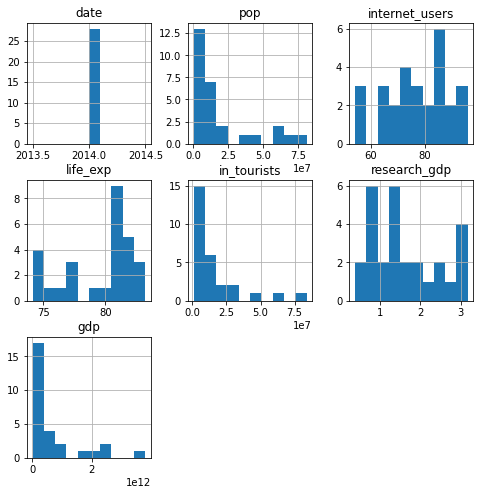

In [32]:
# prepare the figure
fig = plt.figure(figsize = (8,8))
# call 'hist' (a pandas function)
wb2014_df.hist(ax=fig.gca())
# show the figure
plt.show()

- Let us look at life expectancy. You can see that most countries fall above 80 years:

Text(0, 0.5, 'Number of countries')

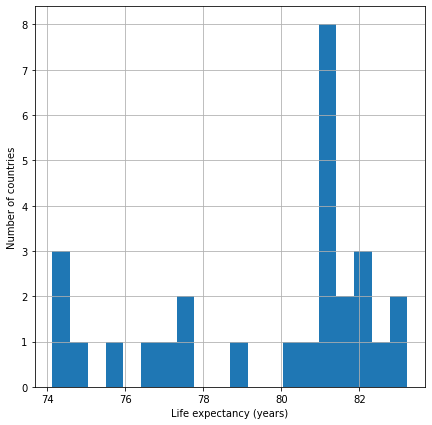

In [30]:
# prepare the figure
fig = plt.figure(figsize = (7,7))
ax = fig.gca()
# histogram of a single variable
wb2014_df['life_exp'].hist(ax=ax, bins=20)
# set x and y axis labels
plt.xlabel("Life expectancy (years)")
plt.ylabel("Number of countries")

### Scatterplots

- This is scatterplot to compare life expectancy and Internet usage:

Text(0, 0.5, 'Internet users %')

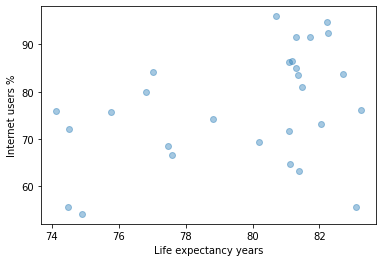

In [27]:
# simple scatter plot on variable x and y:
plt.scatter(wb2014_df.life_exp, wb2014_df.internet_users, alpha=0.4)
# set labels
plt.xlabel("Life expectancy years")
plt.ylabel("Internet users %")

- Without labels, this plot is not very interesting.
- Adding labels to points is more complex and requires the `plt.annotate()` function (code from https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples):

Text(0, 0.5, 'Internet users %')

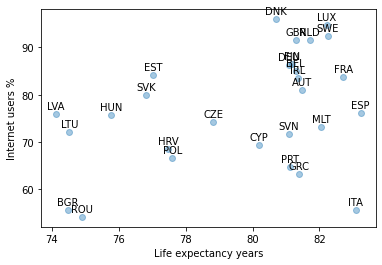

In [28]:
# simple scatter plot on variable x and y:
plt.scatter(wb2014_df.life_exp, wb2014_df.internet_users, alpha=0.4)

# iterate over the two variables (coordinates) and country names
for x,y,country in zip(wb2014_df.life_exp, wb2014_df.internet_users, wb2014_df.iso3c):
    plt.annotate(country, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center')

# set x and y axis labels
plt.xlabel("Life expectancy years")
plt.ylabel("Internet users %")

- The figure shows different groups of countries, such as Eastern Europe, Northern Europe, and Southern Europe. Italy is an interesting outlier with very high life expectancy and very low Internet usage.

End of notebook.